In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Project 2 (P170) -- Hotel Rating Classification\\hotel_reviews.xlsx')

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.shape

(20491, 2)

In [5]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

<AxesSubplot:>

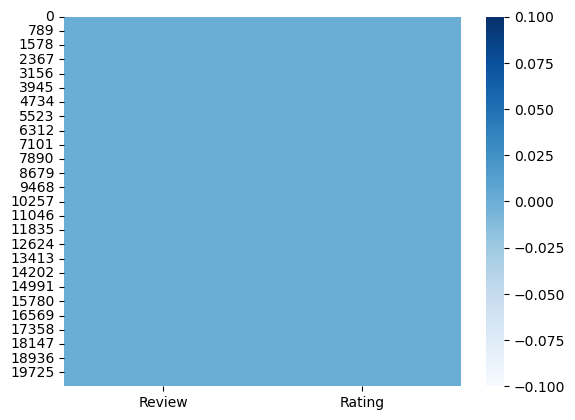

In [6]:
sns.heatmap(df.isnull(),cmap="Blues")

In [7]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [10]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

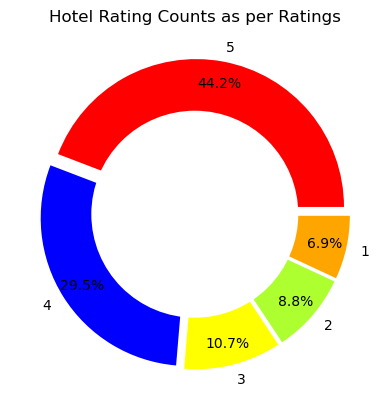

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Rating = ['5', '4', '3',
            '2', '1']
  
# Setting size in Chart based on 
# given values
No_Rating = [9054, 6039, 2184, 1793, 1421]
  
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(No_Rating, colors=colors, labels=Rating,autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Hotel Rating Counts as per Ratings')
  
# Displaying Chart
plt.show()

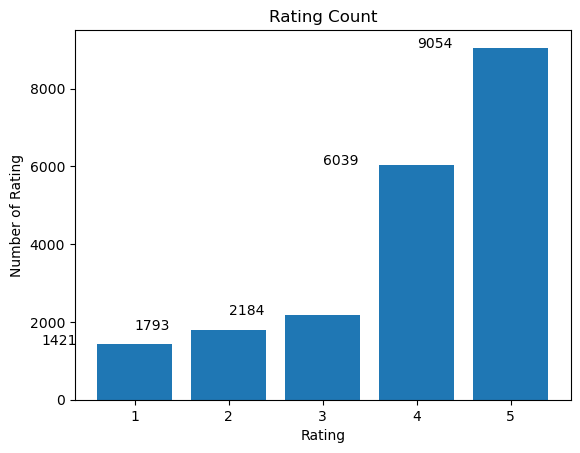

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
if __name__ == '__main__':
    x=[1,2,3,4,5]
    y=[1421,1793,2184,6039,9054]
      
  
    plt.bar(x, y)
      
 
    addlabels(x, y)
      
   
    plt.title("Rating Count")
      
    
    plt.xlabel("Rating")
    plt.ylabel("Number of Rating")
      

    plt.show()

In [13]:
df['Rating'].describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

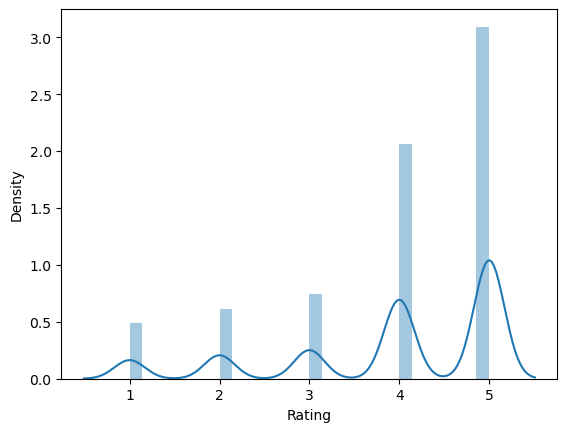

In [14]:
sns.distplot(df['Rating'])

# Data Cleaning 

In [15]:
# Regular Expression 

In [16]:
import re
import string

In [17]:
# Defining a function which makes all text to lowercas,removes brackets, punctuation and numbers

In [18]:

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('[0-9]" "]+'," ",text)
    text = re.sub('[''""..]','',text)
    return text

clean = lambda x:clean_text(x)
    

In [19]:
df['Review']= df.Review.apply(clean)

In [20]:
df.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not experience hotel monaco seattl...,3


In [21]:
# Word Frequency 

In [22]:
# pip install wordcloud
from wordcloud import WordCloud

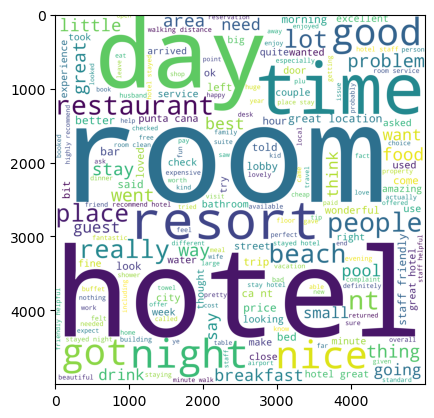

In [23]:
string_total =  ' '.join(df['Review'])
wordcould_stw = WordCloud(background_color = 'white',width = 5000,height = 5000).generate(string_total)
plt.imshow(wordcould_stw)

In [24]:
frequency = pd.Series(' '.join(df['Review']).split()).value_counts()[:20]

In [25]:
frequency

hotel       48832
room        34300
not         31525
great       21087
nt          18989
good        16972
staff       16203
stay        15153
did         13892
just        12589
nice        12399
rooms       12015
no          11603
location    11032
stayed      10466
service      9961
time         9816
beach        9581
night        9423
clean        9359
dtype: int64

<AxesSubplot:>

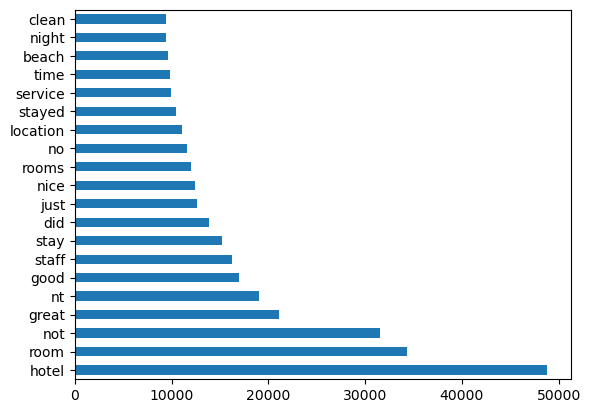

In [26]:
frequency.plot(kind='barh')

In [27]:
# Removal of STOP WORDS

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [30]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [31]:
# Word Frequency after removal of STOP WORDS

In [32]:
frequency2 = pd.Series(' '.join(df['Review']).split()).value_counts()[:20]


In [33]:
frequency2

hotel        48832
room         34300
great        21087
nt           18989
good         16972
staff        16203
stay         15153
nice         12399
rooms        12015
location     11032
stayed       10466
service       9961
time          9816
beach         9581
night         9423
clean         9359
day           9340
breakfast     9271
food          8990
like          8112
dtype: int64

<AxesSubplot:>

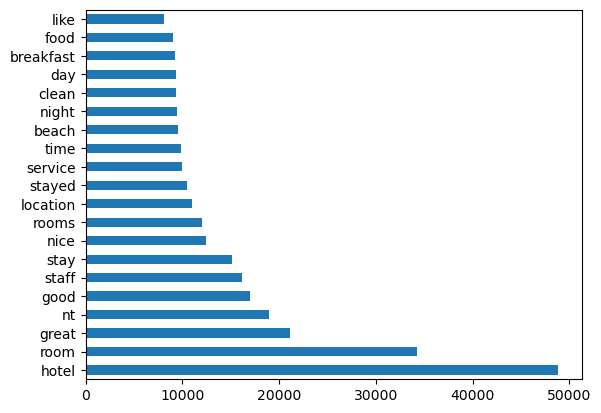

In [34]:
frequency2.plot(kind='barh')

In [35]:
frequency2

hotel        48832
room         34300
great        21087
nt           18989
good         16972
staff        16203
stay         15153
nice         12399
rooms        12015
location     11032
stayed       10466
service       9961
time          9816
beach         9581
night         9423
clean         9359
day           9340
breakfast     9271
food          8990
like          8112
dtype: int64

In [36]:
# Count Vectoriser

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

In [38]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X=vectorizer.fit_transform(df['Review'])

In [39]:
word_freq_df = pd.DataFrame({'Term':vectorizer.get_feature_names(),'Occurances' : np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['Frequency'] = word_freq_df['Occurances']/np.sum(word_freq_df['Occurances'])


C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
word_freq_df.head(20).sort_values(by='Frequency', ascending=False)

,Term,Occurances,Frequency
1,aaa,60,3.001537e-05
0,aa,13,6.503330e-06
13,aalders,8,4.002049e-06
17,aarp,3,1.500768e-06
16,aaron,3,1.500768e-06
19,aas,2,1.000512e-06
6,aaaare,1,5.002561e-07
7,aaah,1,5.002561e-07
8,aaahhh,1,5.002561e-07
9,aadvantage,1,5.002561e-07


In [41]:
# TFIDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Top 500 Words

In [44]:
vectorizer = TfidfVectorizer(stop_words = 'english',max_features = 500,max_df =0.5,smooth_idf = True)
doc_vec = vectorizer.fit_transform(df['Review'])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()


C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
df2 = pd.DataFrame(denselist,columns =names_features )

In [46]:
df2

,able,absolutely,access,activities,actually,afternoon,air,airport,amazing,amenities,...,worked,working,world,worst,worth,wrong,year,years,yes,york
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.095207,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.195339,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
4,0.0,0.000000,0.0,0.107348,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.102409,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20487,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20488,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0
20489,0.0,0.073794,0.0,0.000000,0.037284,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.125307,0.0,0.0,0.0,0.000000,0.105892,0.0,0.00000,0.0


# N-Gram - Words Combination Identification

In [47]:
# Bi-gram

In [48]:
def top_n2_words (corpus ,n=None):
    vec1 = CountVectorizer(ngram_range =(2,2), max_features = 500).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq [:n]    

In [49]:
top2_words_combo = top_n2_words(df['Review'], n=500)
top2_words_combo_df = pd.DataFrame(top2_words_combo)
top2_words_combo_df.columns = ['Bi-Grams','Frequency']
top2_words_combo_df.head()

,Bi-Grams,Frequency
0,great location,2139
1,staff friendly,2077
2,ca nt,1809
3,punta cana,1682
4,hotel great,1465


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'great location'),
 Text(1, 0, 'staff friendly'),
 Text(2, 0, 'ca nt'),
 Text(3, 0, 'punta cana'),
 Text(4, 0, 'hotel great'),
 Text(5, 0, 'great hotel'),
 Text(6, 0, 'walking distance'),
 Text(7, 0, 'recommend hotel'),
 Text(8, 0, 'friendly helpful'),
 Text(9, 0, 'hotel staff'),
 Text(10, 0, 'stayed hotel'),
 Text(11, 0, 'room service'),
 Text(12, 0, 'stay hotel'),
 Text(13, 0, 'highly recommend'),
 Text(14, 0, 'room clean'),
 Text(15, 0, 'staff helpful'),
 Text(16, 0, 'place stay'),
 Text(17, 0, 'minute walk'),
 Text(18, 0, 'stayed nights'),
 Text(19, 0, 'hotel stayed')]

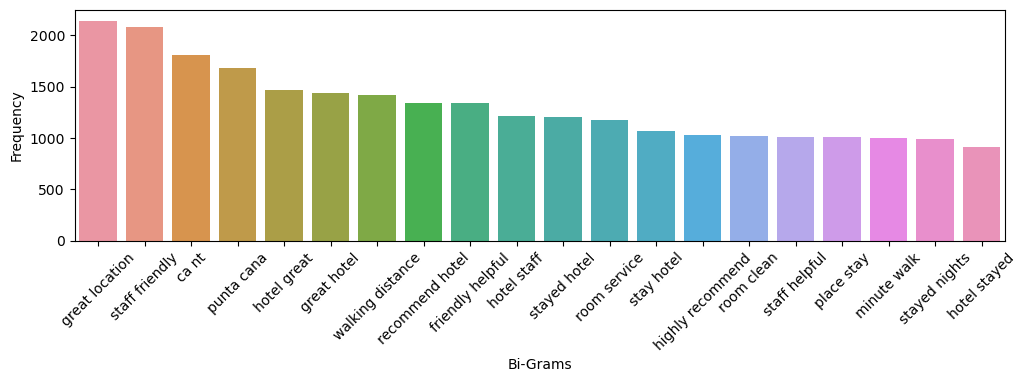

In [51]:
top20_bigram =  top2_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (12,3))
plot = sns.barplot(x=top20_bigram['Bi-Grams'],y=top20_bigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_bigram['Bi-Grams'])


In [52]:
# Bi-Gram for 1 star 

In [53]:
dfr1=df.loc[df['Rating']==1]

In [54]:
top2_words_combo = top_n2_words(dfr1['Review'], n=500)
top2_words_combo_df = pd.DataFrame(top2_words_combo)
top2_words_combo_df.columns = ['Bi-Grams','Frequency']
top2_words_combo_df.head()

,Bi-Grams,Frequency
0,punta cana,150
1,credit card,110
2,customer service,104
3,stay hotel,99
4,star hotel,95


[Text(0, 0, 'punta cana'),
 Text(1, 0, 'credit card'),
 Text(2, 0, 'customer service'),
 Text(3, 0, 'stay hotel'),
 Text(4, 0, 'star hotel'),
 Text(5, 0, 'hotel staff'),
 Text(6, 0, 'worst hotel'),
 Text(7, 0, 'room service'),
 Text(8, 0, 'stay away'),
 Text(9, 0, 'hotel room'),
 Text(10, 0, 'ca nt'),
 Text(11, 0, 'stayed hotel'),
 Text(12, 0, 'air conditioning'),
 Text(13, 0, 'got room'),
 Text(14, 0, 'nt stay'),
 Text(15, 0, 'travel agent'),
 Text(16, 0, 'nt work'),
 Text(17, 0, 'san juan'),
 Text(18, 0, 'booked hotel'),
 Text(19, 0, 'hotel stayed')]

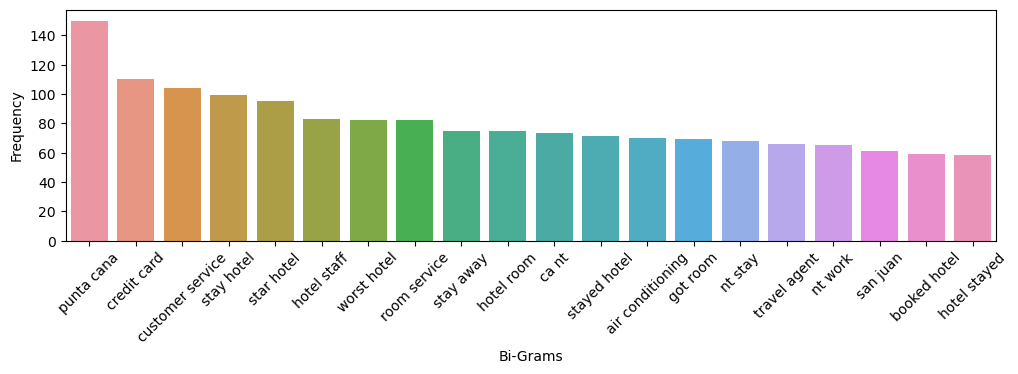

In [55]:
top20_bigram =  top2_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (12,3))
plot = sns.barplot(x=top20_bigram['Bi-Grams'],y=top20_bigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_bigram['Bi-Grams'])

In [56]:
# Bi-Gram for 5 star 

In [57]:
dfr5=df.loc[df['Rating']==5]

In [58]:
top2_words_combo = top_n2_words(dfr5['Review'], n=500)
top2_words_combo_df = pd.DataFrame(top2_words_combo)
top2_words_combo_df.columns = ['Bi-Grams','Frequency']
top2_words_combo_df.head()

,Bi-Grams,Frequency
0,staff friendly,957
1,great location,956
2,great hotel,923
3,ca nt,911
4,recommend hotel,816


[Text(0, 0, 'staff friendly'),
 Text(1, 0, 'great location'),
 Text(2, 0, 'great hotel'),
 Text(3, 0, 'ca nt'),
 Text(4, 0, 'recommend hotel'),
 Text(5, 0, 'hotel great'),
 Text(6, 0, 'friendly helpful'),
 Text(7, 0, 'highly recommend'),
 Text(8, 0, 'walking distance'),
 Text(9, 0, 'hotel staff'),
 Text(10, 0, 'punta cana'),
 Text(11, 0, 'stayed hotel'),
 Text(12, 0, 'place stay'),
 Text(13, 0, 'hotel stayed'),
 Text(14, 0, 'stay hotel'),
 Text(15, 0, 'staff helpful'),
 Text(16, 0, 'definitely stay'),
 Text(17, 0, 'new york'),
 Text(18, 0, 'room service'),
 Text(19, 0, 'minute walk')]

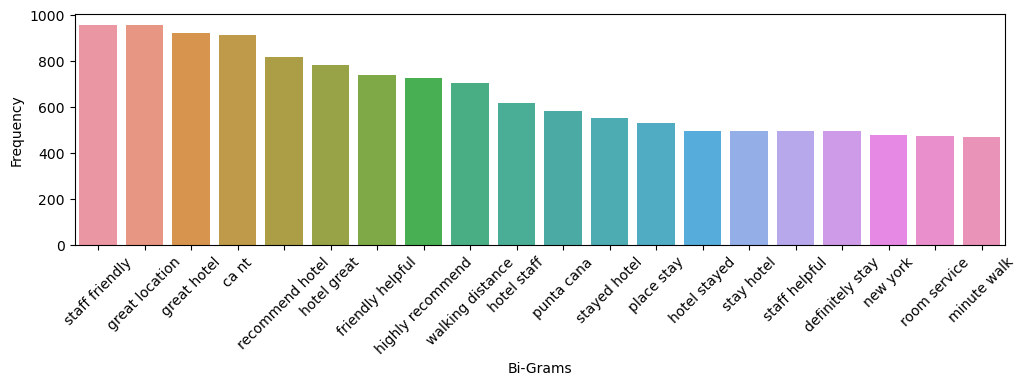

In [59]:
top20_bigram =  top2_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (12,3))
plot = sns.barplot(x=top20_bigram['Bi-Grams'],y=top20_bigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_bigram['Bi-Grams'])

In [60]:
# Tri-gram

In [61]:
def top_n3_words (corpus ,n=None):
    vec1 = CountVectorizer(ngram_range =(3,3), max_features = 500).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq [:n]    

In [62]:
top3_words_combo = top_n3_words(df['Review'], n=500)
top3_words_combo_df = pd.DataFrame(top3_words_combo)
top3_words_combo_df.columns = ['Tri-Grams','Frequency']
top3_words_combo_df.head()

,Tri-Grams,Frequency
0,staff friendly helpful,700
1,hotel great location,541
2,old san juan,354
3,highly recommend hotel,313
4,great place stay,273


[Text(0, 0, 'staff friendly helpful'),
 Text(1, 0, 'hotel great location'),
 Text(2, 0, 'old san juan'),
 Text(3, 0, 'highly recommend hotel'),
 Text(4, 0, 'great place stay'),
 Text(5, 0, 'ca nt wait'),
 Text(6, 0, 'king size bed'),
 Text(7, 0, 'flat screen tv'),
 Text(8, 0, 'great hotel great'),
 Text(9, 0, 'good value money'),
 Text(10, 0, 'stayed hotel nights'),
 Text(11, 0, 'hotel staff friendly'),
 Text(12, 0, 'easy walking distance'),
 Text(13, 0, 'free internet access'),
 Text(14, 0, 'ca nt beat'),
 Text(15, 0, 'hotel good location'),
 Text(16, 0, 'la carte restaurants'),
 Text(17, 0, 'staff helpful friendly'),
 Text(18, 0, 'ca nt say'),
 Text(19, 0, 'returned night stay')]

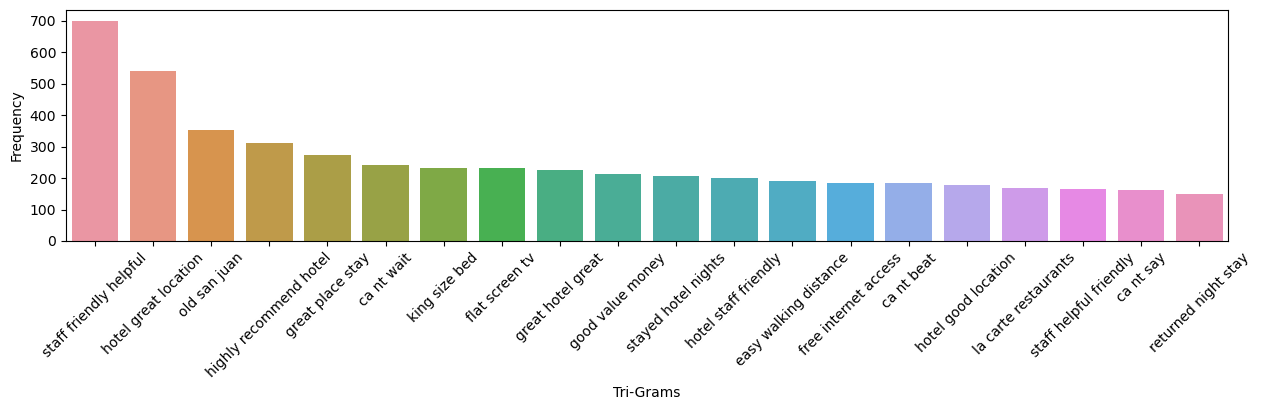

In [63]:
top20_trigram =  top3_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (15,3))
plot = sns.barplot(x=top20_trigram['Tri-Grams'],y=top20_trigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_trigram['Tri-Grams'])

In [64]:
# Tri-gram for 1 star 

In [69]:
top3_words_combo = top_n3_words(dfr1['Review'], n=500)
top3_words_combo_df = pd.DataFrame(top3_words_combo)
top3_words_combo_df.columns = ['Tri-Grams','Frequency']
top3_words_combo_df.head()

,Tri-Grams,Frequency
0,worst hotel stayed,30
1,worst hotel experience,16
2,old san juan,14
3,nt waste money,13
4,finally got room,13


In [72]:
dfr1=df.loc[df['Rating']==1]
dfr1

,Review,Rating
15,horrible customer service hotel stay february ...,1
32,noise airconditionera standard arranged stay t...,1
40,bad choice booked hotel hot wire called immedi...,1
65,hated inn terrible roomservice horrible staff ...,1
69,ace grunge lives mold mildew tiny bed metal si...,1
...,...,...
20421,worst sleep hip tooooo hip nite club building ...,1
20460,june stay stayed hotel june read reviews websi...,1
20465,stay hotel brought group february worst hotel ...,1
20467,returning la concha nightmare surprising hotel...,1


[Text(0, 0, 'worst hotel stayed'),
 Text(1, 0, 'worst hotel experience'),
 Text(2, 0, 'old san juan'),
 Text(3, 0, 'nt waste money'),
 Text(4, 0, 'finally got room'),
 Text(5, 0, 'king size bed'),
 Text(6, 0, 'year old son'),
 Text(7, 0, 'resort punta cana'),
 Text(8, 0, 'melia caribe tropical'),
 Text(9, 0, 'good thing hotel'),
 Text(10, 0, 'holiday inn express'),
 Text(11, 0, 'ca nt believe'),
 Text(12, 0, 'nt speak spanish'),
 Text(13, 0, 'non smoking room'),
 Text(14, 0, 'called desk told'),
 Text(15, 0, 'staff extremely rude'),
 Text(16, 0, 'make matters worse'),
 Text(17, 0, 'stay away hotel'),
 Text(18, 0, 'long story short'),
 Text(19, 0, 'credit card details')]

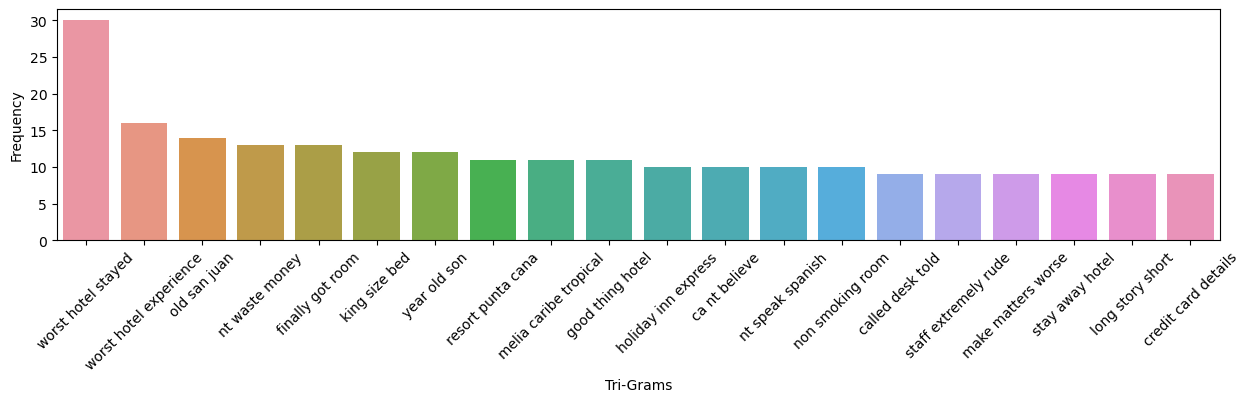

In [76]:
top20_trigram =  top3_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (15,3))
plot = sns.barplot(x=top20_trigram['Tri-Grams'],y=top20_trigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_trigram['Tri-Grams'])

In [77]:
# Tri-gram for 5 star

In [78]:
top3_words_combo = top_n3_words(dfr5['Review'], n=500)
top3_words_combo_df = pd.DataFrame(top3_words_combo)
top3_words_combo_df.columns = ['Tri-Grams','Frequency']
top3_words_combo_df.head()

,Tri-Grams,Frequency
0,staff friendly helpful,364
1,hotel great location,290
2,highly recommend hotel,257
3,ca nt wait,195
4,great hotel great,167


[Text(0, 0, 'staff friendly helpful'),
 Text(1, 0, 'hotel great location'),
 Text(2, 0, 'highly recommend hotel'),
 Text(3, 0, 'ca nt wait'),
 Text(4, 0, 'great hotel great'),
 Text(5, 0, 'great place stay'),
 Text(6, 0, 'flat screen tv'),
 Text(7, 0, 'old san juan'),
 Text(8, 0, 'hotel staff friendly'),
 Text(9, 0, 'king size bed'),
 Text(10, 0, 'ca nt say'),
 Text(11, 0, 'free internet access'),
 Text(12, 0, 'great location great'),
 Text(13, 0, 'easy walking distance'),
 Text(14, 0, 'staff helpful friendly'),
 Text(15, 0, 'staff extremely helpful'),
 Text(16, 0, 'definitely recommend hotel'),
 Text(17, 0, 'ca nt beat'),
 Text(18, 0, 'stayed hotel nights'),
 Text(19, 0, 'staff extremely friendly')]

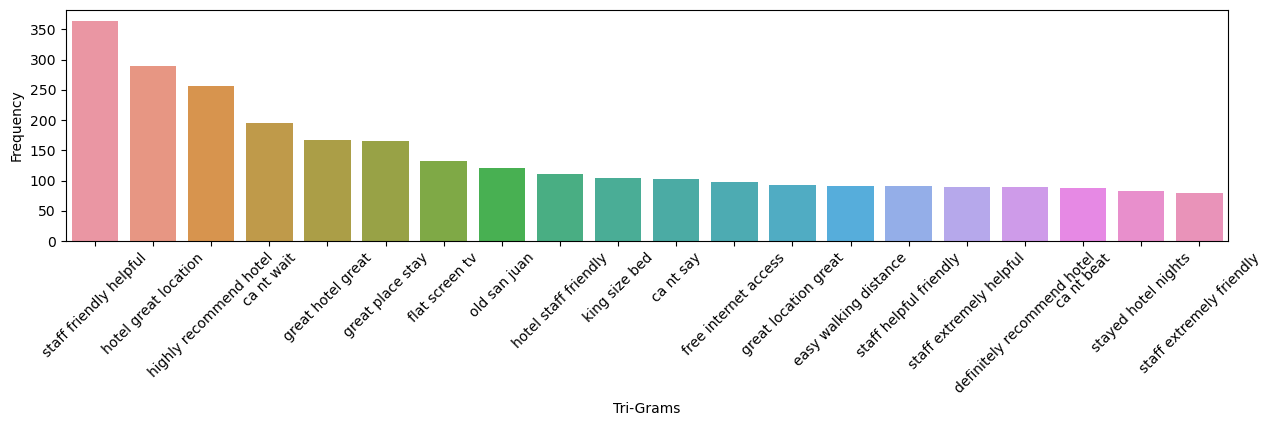

In [80]:
top20_trigram =  top3_words_combo_df.iloc[0:20,:]
fig = plt.figure(figsize = (15,3))
plot = sns.barplot(x=top20_trigram['Tri-Grams'],y=top20_trigram['Frequency'])
plot.set_xticklabels(rotation =45,labels=top20_trigram['Tri-Grams'])

In [81]:
# Auto EDA Using Pandas Profiling and Sweetix

In [82]:
#!pip install sweetviz
import sweetviz as sv

In [83]:
sweet_report = sv.analyze(df)
sweet_report.show_html('Hotel Rating Classification_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Hotel Rating Classification_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model Building

# Naive Bayes classification 


# Using Bag Of Words

In [86]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms experience hotel monaco seattle goo...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [87]:
# function to split 

def split_into_words(i):
    return(i.split(' '))

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
email_train,email_test = train_test_split(df, test_size = 0.25)

In [90]:
email_train

,Review,Rating
15353,interesting architecure unrivalled service ama...,5
7388,loved returned nights drury new orleans locati...,4
20192,nice design hotel husband went romantic weeken...,4
774,tier hotel great stay place darmes hotel welll...,5
12687,cheap worth bedbugs cheap definitely heart ams...,1
...,...,...
16602,thumbs jaya worst hotel experience arrived run...,2
14332,beter barcelona basis comparison properties ba...,3
16041,good airport hotel booked hotel early departur...,2
7598,nice surprise view stayed nights executive sui...,5


In [91]:
emails_bow = CountVectorizer(analyzer = split_into_words).fit(df['Review'])

In [92]:
all_emails_matrix = emails_bow.transform(df['Review'])

In [93]:
all_emails_matrix.shape

(20491, 75173)

In [94]:
train_emails_matrix = emails_bow.transform(email_train['Review'])

In [95]:
train_emails_matrix.shape

(15368, 75173)

In [96]:
test_emails_matrix = emails_bow.transform(email_test['Review'])

In [97]:
test_emails_matrix.shape

(5123, 75173)

In [98]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [99]:
# Multinomial Naive Bayes

In [100]:
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.Rating)
train_pred_m = classifier_mb.predict(train_emails_matrix)
Multinomial_Naive_Bayes_BOW_Train_accuracy= np.mean(train_pred_m==email_train.Rating)
print('Multinomial_Naive_Bayes_BOW_Train_accuracy =',round(Multinomial_Naive_Bayes_BOW_Train_accuracy*100))

Multinomial_Naive_Bayes_BOW_Train_accuracy = 75


In [101]:
test_pred_m = classifier_mb.predict(test_emails_matrix)
Multinomial_Naive_Bayes_BOW_Test_accuracy = np.mean(test_pred_m==email_test.Rating)
print('Multinomial_Naive_Bayes_BOW_Test_accuracy =',round(Multinomial_Naive_Bayes_BOW_Test_accuracy *100))

Multinomial_Naive_Bayes_BOW_Test_accuracy = 56


In [102]:
# Gaussian Naive Bayes

In [103]:
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.Rating.values)


GaussianNB()

In [104]:
train_pred_g =  classifier_gb.predict(train_emails_matrix.toarray())
GaussianNB_BOW_Train_accuracy = np.mean(train_pred_g == email_train.Rating)


In [105]:
print('GaussianNB_BOW_Train_accuracy  =',round(GaussianNB_BOW_Train_accuracy *100))

GaussianNB_BOW_Train_accuracy  = 85


In [106]:
test_pred_g =  classifier_gb.predict(test_emails_matrix.toarray())
GaussianNB_BOW_Test_accuracy  = np.mean(test_pred_g == email_test.Rating) 

In [107]:
print('GaussianNB_BOW_Test_accuracy  =',round(GaussianNB_BOW_Test_accuracy *100))

GaussianNB_BOW_Test_accuracy  = 31


# Using TFIDF

In [108]:
from sklearn.feature_extraction.text import TfidfTransformer

In [109]:
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

In [110]:
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

In [111]:
train_tfidf.shape

(15368, 75173)

In [112]:
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

In [113]:
test_tfidf.shape

(5123, 75173)

In [114]:
# Multinomial Naive Bayes

In [115]:
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.Rating)
train_pred_m = classifier_mb.predict(train_tfidf)
Multinomial_Naive_Bayes_TFIDF_Train_accuracy = np.mean(train_pred_m==email_train.Rating)
  

In [116]:
print('Multinomial_Naive_Bayes_TFIDF_Train_accuracy =',round(Multinomial_Naive_Bayes_TFIDF_Train_accuracy*100))

Multinomial_Naive_Bayes_TFIDF_Train_accuracy = 45


In [117]:
test_pred_m = classifier_mb.predict(test_tfidf)
Multinomial_Naive_Bayes_TFIDF_Test_accuracy = np.mean(test_pred_m==email_test.Rating)


In [118]:
print('Multinomial_Naive_Bayes_TFIDF_Test_accuracy  =',round(Multinomial_Naive_Bayes_TFIDF_Test_accuracy *100)) 

Multinomial_Naive_Bayes_TFIDF_Test_accuracy  = 44


In [119]:
# Gaussian Naive Bayes

In [120]:
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.Rating.values)

GaussianNB()

In [121]:
train_pred_g =  classifier_gb.predict(train_tfidf.toarray())
GaussianNB_TFIDF_Train_accuracy = np.mean(train_pred_g == email_train.Rating)

In [122]:
print('GaussianNB_TFIDF_Train_accuracy =', round(GaussianNB_TFIDF_Train_accuracy*100))

GaussianNB_TFIDF_Train_accuracy = 86


In [123]:
test_pred_g =  classifier_gb.predict(test_tfidf.toarray())
GaussianNB_TFIDF_Test_accuracy = np.mean(test_pred_g == email_test.Rating) 

In [124]:
print('GaussianNB_TFIDF_Test_accuracy =', round(GaussianNB_TFIDF_Test_accuracy*100))

GaussianNB_TFIDF_Test_accuracy = 31


# EMOTION MINING

In [125]:
afinn = pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Project 2 (P170) -- Hotel Rating Classification\\Afinn.csv',sep = ',',encoding = 'latin-1')

In [126]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [127]:
afinn.shape

(2477, 2)

In [128]:
# pip install spacy 

In [129]:
import numpy as np 
import pandas as pd
import string
import spacy
import matplotlib.pyplot as plt 

In [130]:
dfr = df.iloc[:,[0]]

In [131]:
dfr

,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms experience hotel monaco seattle goo...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...
...,...
20486,best kept secret time staying charm ca nt beat...
20487,great location price view hotel great quick pl...
20488,ok looks nice modern outside desk staff nt par...
20489,hotel theft ruined vacation hotel opened sept ...


In [132]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkdk0001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [133]:
from nltk import tokenize

In [134]:
dfr

,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms experience hotel monaco seattle goo...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...
...,...
20486,best kept secret time staying charm ca nt beat...
20487,great location price view hotel great quick pl...
20488,ok looks nice modern outside desk staff nt par...
20489,hotel theft ruined vacation hotel opened sept ...


In [135]:
affinity_score = afinn.set_index('word')['value'].to_dict()

In [136]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [137]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_score

In [138]:
def calculate_sentiment(text: str =None):
    sent_score = 0
    if text:
        sentence =nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [139]:
calculate_sentiment(text ='amazing')

4

In [140]:
dfr['sentiment_value'] = dfr['Review'].apply(calculate_sentiment)

In [141]:
dfr

,Review,sentiment_value
0,nice hotel expensive parking got good deal sta...,26
1,ok nothing special charge diamond member hilto...,38
2,nice rooms experience hotel monaco seattle goo...,24
3,unique great stay wonderful time hotel monaco ...,39
4,great stay great stay went seahawk game awesom...,36
...,...,...
20486,best kept secret time staying charm ca nt beat...,16
20487,great location price view hotel great quick pl...,19
20488,ok looks nice modern outside desk staff nt par...,7
20489,hotel theft ruined vacation hotel opened sept ...,-3


In [142]:
dfr['sentiment_value'].describe()

count    20491.000000
mean        20.388463
std         17.866043
min        -39.000000
25%         10.000000
50%         18.000000
75%         27.000000
max        296.000000
Name: sentiment_value, dtype: float64

In [143]:
dfr.sort_values(by =['sentiment_value']).head()

,Review,sentiment_value
18127,learned lesson major disappointment used onlin...,-39
3865,natura park vacation hell natura park reviewwe...,-34
2498,terrible service nt stay friend decided stay h...,-34
14382,rude young manager terrible service man hotel ...,-34
6453,hotel worst accomodation experience life extre...,-31


In [144]:
dfr.sort_values(by =['sentiment_value'],ascending = False).head()

,Review,sentiment_value
17777,fantastic return trip firstly apology length r...,296
18917,ocean blue excellent resort boyfriend stayed o...,239
14116,ca nt wait till year stayed lofts week adults ...,212
16764,great trip wow vacation let preface saying lit...,190
7072,honest review visit let begin saying heard sec...,189


In [145]:
dfr['Index']=range(0,len(dfr))

In [146]:
dfr['Rating']= df['Rating']

In [147]:
dfr

,Review,sentiment_value,Index,Rating
0,nice hotel expensive parking got good deal sta...,26,0,4
1,ok nothing special charge diamond member hilto...,38,1,2
2,nice rooms experience hotel monaco seattle goo...,24,2,3
3,unique great stay wonderful time hotel monaco ...,39,3,5
4,great stay great stay went seahawk game awesom...,36,4,5
...,...,...,...,...
20486,best kept secret time staying charm ca nt beat...,16,20486,5
20487,great location price view hotel great quick pl...,19,20487,4
20488,ok looks nice modern outside desk staff nt par...,7,20488,2
20489,hotel theft ruined vacation hotel opened sept ...,-3,20489,1


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

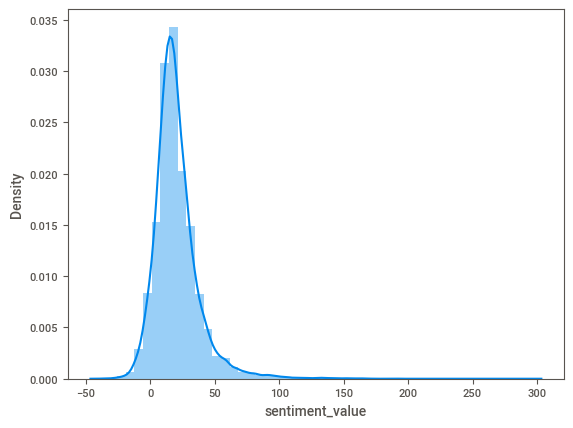

In [149]:
sns.distplot(dfr['sentiment_value'])

<AxesSubplot:xlabel='Index', ylabel='sentiment_value'>

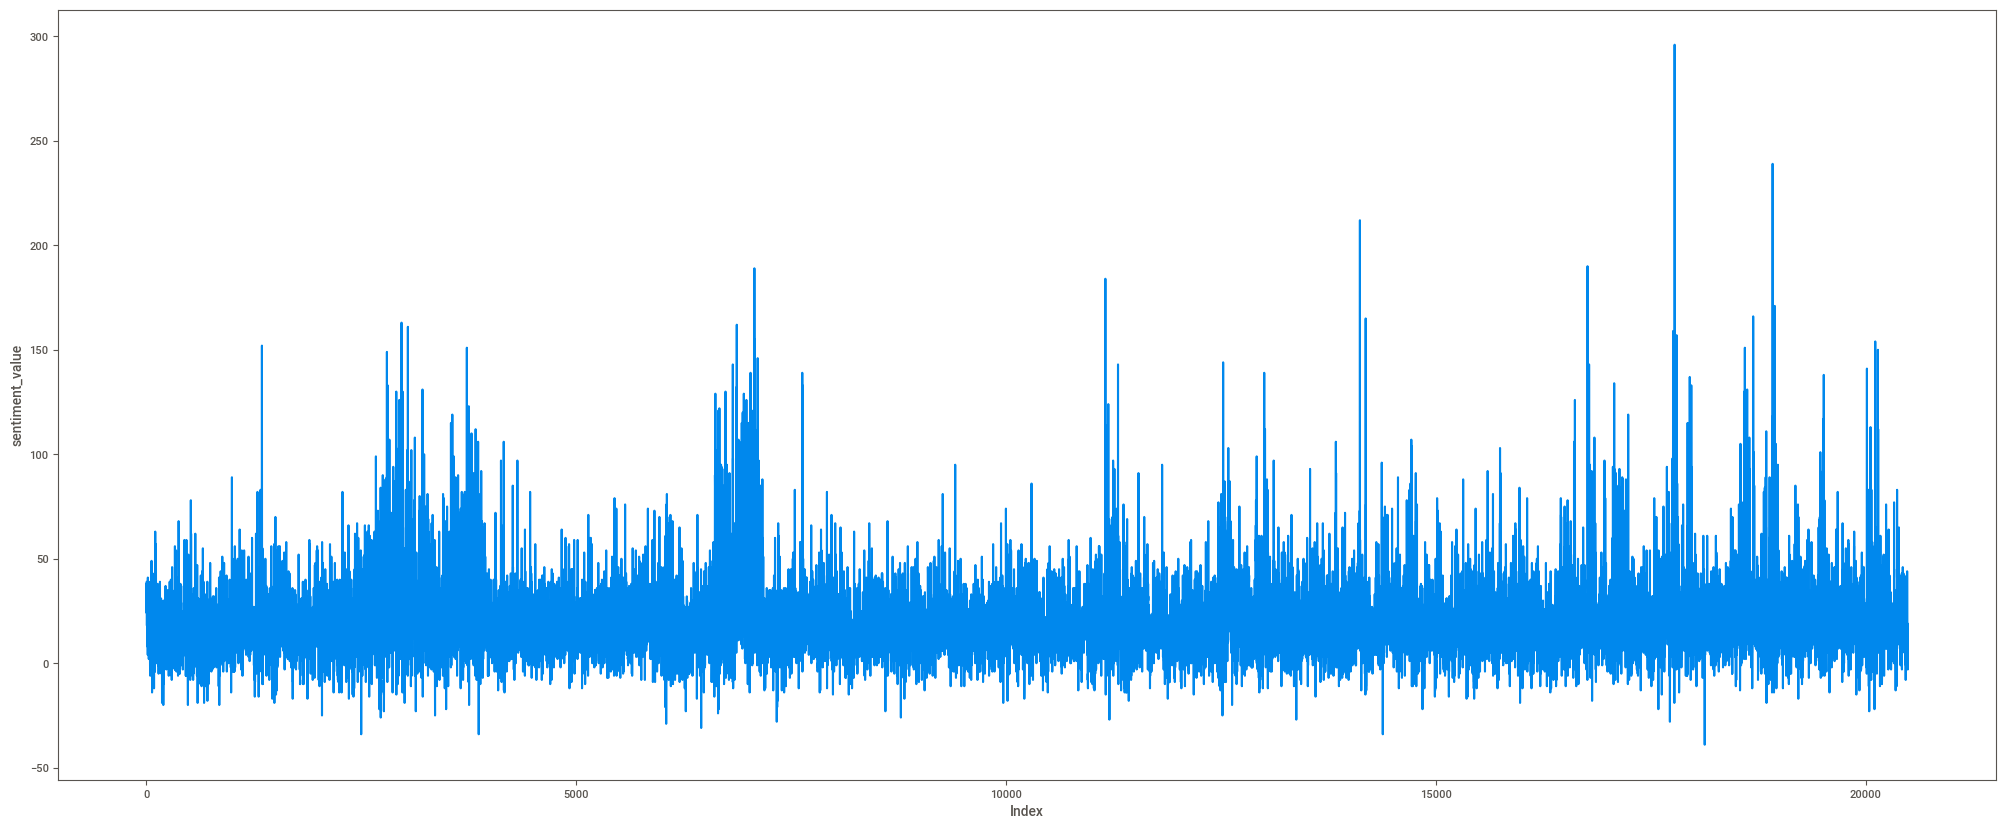

In [150]:
plt.figure(figsize=(25,10))
sns.lineplot(x='Index',y='sentiment_value',data = dfr)

In [151]:
dfr['word_count'] = dfr['Review'].str.split().apply(len)
dfr['word_count'].head(10)

0     80
1    228
2    195
3     85
4    178
5    128
6     96
7     83
8     58
9     33
Name: word_count, dtype: int64

<AxesSubplot:xlabel='word_count', ylabel='sentiment_value'>

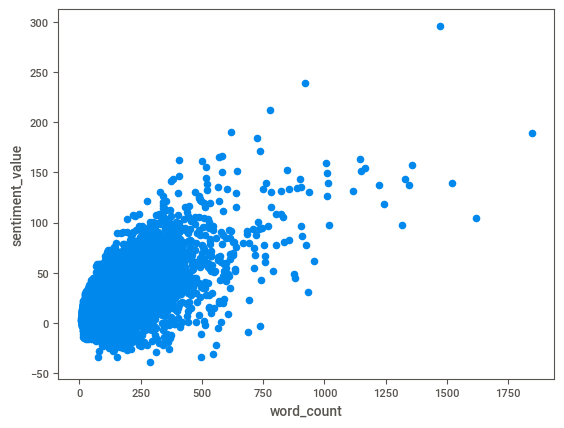

In [152]:
dfr.plot.scatter(x='word_count',y='sentiment_value')

In [153]:
# Final Model With New Feature

In [154]:
def numm(x):
    if x in (1,2):
         y=1
    elif x==3:
         y=2
    elif x in (4,5):
         y=3
            
    return y   

In [155]:
numm(3)

2

In [156]:
dfn=df

In [157]:
dfn['New_Class']=df['Rating'].apply(numm)

In [158]:
dfn=dfn.drop(columns =['Rating'])

In [159]:
dfn

,Review,New_Class
0,nice hotel expensive parking got good deal sta...,3
1,ok nothing special charge diamond member hilto...,1
2,nice rooms experience hotel monaco seattle goo...,2
3,unique great stay wonderful time hotel monaco ...,3
4,great stay great stay went seahawk game awesom...,3
...,...,...
20486,best kept secret time staying charm ca nt beat...,3
20487,great location price view hotel great quick pl...,3
20488,ok looks nice modern outside desk staff nt par...,1
20489,hotel theft ruined vacation hotel opened sept ...,1


In [160]:
email_train,email_test = train_test_split(dfn, test_size = 0.25)

In [161]:
emails_bow = CountVectorizer(analyzer = split_into_words).fit(dfn['Review'])
all_emails_matrix = emails_bow.transform(dfn['Review'])
train_emails_matrix = emails_bow.transform(email_train['Review'])
test_emails_matrix = emails_bow.transform(email_test['Review'])


In [162]:
dfn

,Review,New_Class
0,nice hotel expensive parking got good deal sta...,3
1,ok nothing special charge diamond member hilto...,1
2,nice rooms experience hotel monaco seattle goo...,2
3,unique great stay wonderful time hotel monaco ...,3
4,great stay great stay went seahawk game awesom...,3
...,...,...
20486,best kept secret time staying charm ca nt beat...,3
20487,great location price view hotel great quick pl...,3
20488,ok looks nice modern outside desk staff nt par...,1
20489,hotel theft ruined vacation hotel opened sept ...,1


In [163]:
# Multinomial Naive Bayes With New Feature

In [164]:
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.New_Class)
train_pred_m = classifier_mb.predict(train_emails_matrix)
Multinomial_Naive_Bayes_BOW_NEW_Feture_Train_accuracy = np.mean(train_pred_m==email_train.New_Class)



In [165]:
print('Multinomial_Naive_Bayes_BOW_NEW_Feture_Train_accuracy =',round(Multinomial_Naive_Bayes_BOW_NEW_Feture_Train_accuracy *100))

Multinomial_Naive_Bayes_BOW_NEW_Feture_Train_accuracy = 88


In [166]:
test_pred_m = classifier_mb.predict(test_emails_matrix)
Multinomial_Naive_Bayes_BOW_NEW_Feture_Test_accuracy = np.mean(test_pred_m==email_test.New_Class)


In [167]:
print('Multinomial_Naive_Bayes_BOW_NEW_Feture_Test_accuracy =',round(Multinomial_Naive_Bayes_BOW_NEW_Feture_Test_accuracy *100))


Multinomial_Naive_Bayes_BOW_NEW_Feture_Test_accuracy = 84


In [168]:
# Gaussian Naive Bayes With New Feature

In [169]:
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.New_Class.values)


GaussianNB()

In [170]:
train_pred_g =  classifier_gb.predict(train_emails_matrix.toarray())
GaussianNB_BOW_NEW_feature_Train_accuracy  = np.mean(train_pred_g == email_train.New_Class)


In [171]:
print('GaussianNB_BOW_NEW_feature_Train_accuracy  =', round(GaussianNB_BOW_NEW_feature_Train_accuracy *100))

GaussianNB_BOW_NEW_feature_Train_accuracy  = 88


In [172]:
test_pred_g =  classifier_gb.predict(test_emails_matrix.toarray())

In [173]:
GaussianNB_BOW_NEW_feature_Test_accuracy= np.mean(test_pred_g == email_test.New_Class) 

In [174]:
print ('GaussianNB_BOW_NEW_feature_Test_accuracy =',round(GaussianNB_BOW_NEW_feature_Test_accuracy * 100))

GaussianNB_BOW_NEW_feature_Test_accuracy = 59


In [175]:
print('Multinomial_Naive_Bayes_BOW_Train_accuracy =',round(Multinomial_Naive_Bayes_BOW_Train_accuracy*100))
print('Multinomial_Naive_Bayes_BOW_Test_accuracy =',round(Multinomial_Naive_Bayes_BOW_Test_accuracy *100))

print('GaussianNB_BOW_Train_accuracy  =',round(GaussianNB_BOW_Train_accuracy *100))
print('GaussianNB_BOW_Test_accuracy  =',round(GaussianNB_BOW_Test_accuracy *100))

print('Multinomial_Naive_Bayes_TFIDF_Train_accuracy =',round(Multinomial_Naive_Bayes_TFIDF_Train_accuracy*100))
print('Multinomial_Naive_Bayes_TFIDF_Test_accuracy  =',round(Multinomial_Naive_Bayes_TFIDF_Test_accuracy *100))

print('GaussianNB_TFIDF_Train_accuracy =', round(GaussianNB_TFIDF_Train_accuracy*100))
print('GaussianNB_TFIDF_Test_accuracy =', round(GaussianNB_TFIDF_Test_accuracy*100))

print('Multinomial_Naive_Bayes_BOW_NEW_Feture_Train_accuracy =',round(Multinomial_Naive_Bayes_BOW_NEW_Feture_Train_accuracy *100))
print('Multinomial_Naive_Bayes_BOW_NEW_Feture_Test_accuracy =',round(Multinomial_Naive_Bayes_BOW_NEW_Feture_Test_accuracy *100))

print('GaussianNB_BOW_NEW_feature_Train_accuracy  =', round(GaussianNB_BOW_NEW_feature_Train_accuracy *100))
print ('GaussianNB_BOW_NEW_feature_Test_accuracy =',round(GaussianNB_BOW_NEW_feature_Test_accuracy * 100))

print('Logistic Regression Train accuracy =','82')
print('Logistic Regression Test accuracy =','60')

print('Random Forest Classifier Train accuracy =','100')
print('Random Forest Classifier Test accuracy =','51')

print('SVM Train accuracy =','96')
print('SVM Test accuracy =','60')

Multinomial_Naive_Bayes_BOW_Train_accuracy = 75
Multinomial_Naive_Bayes_BOW_Test_accuracy = 56
GaussianNB_BOW_Train_accuracy  = 85
GaussianNB_BOW_Test_accuracy  = 31
Multinomial_Naive_Bayes_TFIDF_Train_accuracy = 45
Multinomial_Naive_Bayes_TFIDF_Test_accuracy  = 44
GaussianNB_TFIDF_Train_accuracy = 86
GaussianNB_TFIDF_Test_accuracy = 31
Multinomial_Naive_Bayes_BOW_NEW_Feture_Train_accuracy = 88
Multinomial_Naive_Bayes_BOW_NEW_Feture_Test_accuracy = 84
GaussianNB_BOW_NEW_feature_Train_accuracy  = 88
GaussianNB_BOW_NEW_feature_Test_accuracy = 59
Logistic Regression Train accuracy = 82
Logistic Regression Test accuracy = 60
Random Forest Classifier Train accuracy = 100
Random Forest Classifier Test accuracy = 51
SVM Train accuracy = 96
SVM Test accuracy = 60


In [176]:
# Final Model Multinomial Naive Bayes With New Feature

In [177]:
model = MB()
model.fit(train_emails_matrix,email_train.New_Class)
train_pred_m = model.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.New_Class)
print('Train Accuracy =',round(accuracy_train_m *100))

Train Accuracy = 88


In [178]:
test_pred_m = model.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.New_Class)
print('Test Accuracy =',round(accuracy_test_m *100))

Test Accuracy = 84


In [179]:
train_emails_matrix = emails_bow.transform(email_train['Review'])

In [180]:
# Model Saving

In [181]:
from pickle import dump 
from pickle import load

In [203]:
dump(model,open('P2NLPF.sav','wb'))

In [183]:
# Load the Model from Disk

In [184]:
from keras import models

In [204]:
load_model = load (open('P2NLPF.sav','rb'))

In [186]:
#pip install streamlit

In [187]:
def accuracy(y_train,y_train_pred,y_test,y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(y_train,y_train_pred))
    print('\n',confusion_matrix(y_train,y_train_pred))
    print('\n',accuracy_score(y_train,y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(y_test,y_test_pred))
    print('\n',confusion_matrix(y_test,y_test_pred))
    print('\n',accuracy_score(y_test,y_test_pred)) 

In [188]:
df

,Review,Rating,New_Class
0,nice hotel expensive parking got good deal sta...,4,3
1,ok nothing special charge diamond member hilto...,2,1
2,nice rooms experience hotel monaco seattle goo...,3,2
3,unique great stay wonderful time hotel monaco ...,5,3
4,great stay great stay went seahawk game awesom...,5,3
...,...,...,...
20486,best kept secret time staying charm ca nt beat...,5,3
20487,great location price view hotel great quick pl...,4,3
20488,ok looks nice modern outside desk staff nt par...,2,1
20489,hotel theft ruined vacation hotel opened sept ...,1,1


In [189]:
# Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix, balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [191]:
tfidf_vect= TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit(df['Review'])
X_train_tfidf_transform = X_train_tfidf.transform(df['Review'])

In [192]:
def accuracy(y_train,y_train_pred,y_test,y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(y_train,y_train_pred))
    print('\n',confusion_matrix(y_train,y_train_pred))
    print('\n',accuracy_score(y_train,y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(y_test,y_test_pred))
    print('\n',confusion_matrix(y_test,y_test_pred))
    print('\n',accuracy_score(y_test,y_test_pred)) 

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf_transform,df['Rating'],
                                                    test_size=0.3, random_state=30,shuffle=True)
print(X_train.shape,y_train.shape)
X_test.shape,y_test.shape

(14343, 75128) (14343,)


((6148, 75128), (6148,))

In [194]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

           1       0.94      0.87      0.90       995
           2       0.89      0.75      0.81      1252
           3       0.89      0.56      0.69      1555
           4       0.76      0.76      0.76      4194
           5       0.83      0.94      0.88      6347

    accuracy                           0.83     14343
   macro avg       0.86      0.78      0.81     14343
weighted avg       0.83      0.83      0.82     14343


 [[ 863   55   16   30   31]
 [  34  939   60  148   71]
 [  13   44  875  456  167]
 [   4   16   23 3183  968]
 [   3    3    6  361 5974]]

 0.8250714634316392
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           1       0.71      0.57      0.63       426
           2       0.47      0.30      0.37       541
           3       0.45      0.22      0.29       62

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [195]:
X_train

<14343x75128 sparse matrix of type '<class 'numpy.float64'>'
	with 1133010 stored elements in Compressed Sparse Row format>

In [196]:
# Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
rf = RandomForestClassifier(max_features=400)
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       995
           2       1.00      1.00      1.00      1252
           3       1.00      1.00      1.00      1555
           4       1.00      1.00      1.00      4194
           5       1.00      1.00      1.00      6347

    accuracy                           1.00     14343
   macro avg       1.00      1.00      1.00     14343
weighted avg       1.00      1.00      1.00     14343


 [[ 995    0    0    0    0]
 [   0 1252    0    0    0]
 [   0    0 1555    0    0]
 [   0    0    0 4194    0]
 [   0    0    0    0 6347]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           1       0.75      0.35      0.47       426
           2       0.34      0.03      0.06       541
           3       0.50      0.02      0.03       629
           4 

In [199]:
# SVM

In [200]:
from sklearn import svm

In [201]:
svm1 = svm.SVC()
svm1.fit(X_train,y_train)
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       995
           2       0.99      0.98      0.99      1252
           3       1.00      0.92      0.95      1555
           4       0.95      0.94      0.95      4194
           5       0.96      0.99      0.97      6347

    accuracy                           0.97     14343
   macro avg       0.98      0.96      0.97     14343
weighted avg       0.97      0.97      0.97     14343


 [[ 991    3    0    1    0]
 [   0 1224    3   19    6]
 [   0    4 1423   99   29]
 [   0    2    0 3952  240]
 [   0    0    0   72 6275]]

 0.9666736387087778
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           1       0.77      0.50      0.61       426
           2       0.46      0.39      0.42       541
           3       0.48      0.15      0.23       62

In [202]:
# Thank you